In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df=sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#Calculation of mean,median,mode

np.mean(df['total_bill'])

19.785942622950824

In [6]:
np.median(df['total_bill'])

17.795

In [7]:
statistics.mode(df['total_bill'])

13.42

<AxesSubplot:xlabel='total_bill'>

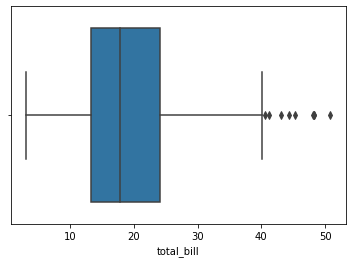

In [8]:
sns.boxplot(df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

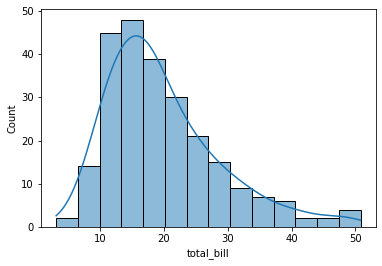

In [9]:
sns.histplot(df['total_bill'],kde=True)

In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
np.percentile(df['tip'],[25,50])

array([2. , 2.9])

In [12]:
##The above distribution is not Gaussian so we will choose the 'iris' dataset which is a Gaussian distribution

df1=sns.load_dataset('iris')

In [13]:
df1.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
121,5.6,2.8,4.9,2.0,virginica
61,5.9,3.0,4.2,1.5,versicolor
75,6.6,3.0,4.4,1.4,versicolor


<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

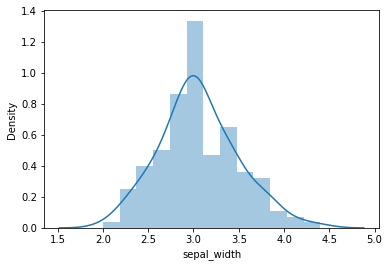

In [14]:
sns.distplot(df1['sepal_width'])

In [15]:
##Finding the OUtliers
# Create a dataset
dataset=[20,21,22,23,24,19,27,18,127,25,25,26,24,22,20,20,129,23,24,20,20,21,23,21,24]

In [16]:
# Outliers using z_score


outliers=[]

def detect_outliers (data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score) > threshold :
         outliers.append(i)
    return outliers            
    

In [17]:
detect_outliers(dataset)

[127, 129]

In [18]:
#Outliers using IQR

dataset=sorted(dataset)                           #1.Sort the dataset in the incresing order

q1,q3=np.percentile(dataset,[25,75])              #2.Finding Q1 and Q3

IQR = q3-q1                                       #3. Calculating IQR

Lower_fence= q1-(1.5*IQR)                         #4. Calculating the Lower_fence and Higher_fence
Higher_fence= q3+(1.5*IQR)

print(Lower_fence,Higher_fence)


14.0 30.0


In [33]:
for i in dataset:
    if i<Higher_fence and i > Lower_fence:
        continue
    print("The outliers are "+ str(i))

The outliers are 127
The outliers are 129


In [34]:
dataset

[18,
 19,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 22,
 22,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 25,
 25,
 26,
 27,
 127,
 129]

In [35]:
# The value that doesn't lie in between Lower_fence and Higher_fence are called the Outliers.
#The above calculation shows that there are two outliers i.e 127, 129 that lies otside the Higher_fence.


<AxesSubplot:>

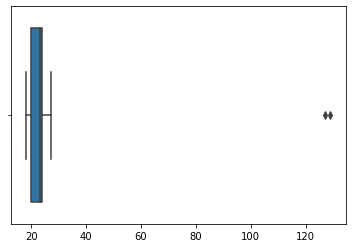

In [36]:
# Outliers Using Boxplot
sns.boxplot(dataset)

## Normalization VS Standardization
Normaliation (MIN-Max Normalization): It scales the whole feature into 0-1
Xnorm= (X-Xmin)/(Xmax-Xmin)
    

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaling = MinMaxScaler()

In [39]:
scaling.fit_transform(df[['total_bill','tip']])

array([[0.29157939, 0.00111111],
       [0.1522832 , 0.07333333],
       [0.3757855 , 0.27777778],
       [0.43171345, 0.25666667],
       [0.45077503, 0.29      ],
       [0.46543779, 0.41222222],
       [0.11939673, 0.11111111],
       [0.49874319, 0.23555556],
       [0.25073314, 0.10666667],
       [0.24528697, 0.24777778],
       [0.15081693, 0.07888889],
       [0.67427734, 0.44444444],
       [0.25869292, 0.06333333],
       [0.32174277, 0.22222222],
       [0.24633431, 0.22444444],
       [0.38772518, 0.32444444],
       [0.15207373, 0.07444444],
       [0.27691663, 0.30111111],
       [0.29116045, 0.27777778],
       [0.36824466, 0.26111111],
       [0.31105991, 0.34222222],
       [0.36070381, 0.19444444],
       [0.2660243 , 0.13666667],
       [0.761416  , 0.73111111],
       [0.35085882, 0.24222222],
       [0.30875576, 0.14888889],
       [0.21575199, 0.11111111],
       [0.20150817, 0.11111111],
       [0.39023879, 0.36666667],
       [0.34729786, 0.22222222],
       [0.

Standardization: It scales the feauture to standard normal distribution i.e the mean=0 and std=1 using the z-score
 z=(x-mu)/std

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
scaler.fit_transform(df[['total_bill','tip']])

array([[-3.14711305e-01, -1.43994695e+00],
       [-1.06323531e+00, -9.69205340e-01],
       [ 1.37779900e-01,  3.63355539e-01],
       [ 4.38315103e-01,  2.25754144e-01],
       [ 5.40744704e-01,  4.43019505e-01],
       [ 6.19536705e-01,  1.23965916e+00],
       [-1.23995452e+00, -7.22971264e-01],
       [ 7.98507107e-01,  8.81527488e-02],
       [-5.34203307e-01, -7.51939979e-01],
       [-5.63468908e-01,  1.67816714e-01],
       [-1.07111451e+00, -9.32994446e-01],
       [ 1.74175992e+00,  1.44968234e+00],
       [-4.91430507e-01, -1.03438495e+00],
       [-1.52624903e-01,  1.24660453e-03],
       [-5.57840908e-01,  1.57309619e-02],
       [ 2.01939101e-01,  6.67527044e-01],
       [-1.06436091e+00, -9.61963161e-01],
       [-3.93503306e-01,  5.15441291e-01],
       [-3.16962505e-01,  3.63355539e-01],
       [ 9.72582994e-02,  2.54722859e-01],
       [-2.10030504e-01,  7.83401903e-01],
       [ 5.67366990e-02, -1.79807863e-01],
       [-4.52034507e-01, -5.56401155e-01],
       [ 2.